In [1]:
from dataset import SequenceDataset
from model import LSTM, Transformer
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [3]:
df = pd.read_csv(r'F:\ML_Bootcamp\LTSF-Linear\dataset\test.csv')
df = preprocess_data(df)

In [4]:
target = 'Close'
features = list(df.columns)

In [5]:
train_size = int(len(df)*.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [6]:
scaled_train_df, scalers = scale_df(train_df)
scaled_test_df = apply_scalers(test_df, scalers)
train_dataset = SequenceDataset(scaled_train_df, target, features)
test_dataset = SequenceDataset(scaled_test_df, target, features)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [7]:
model = Transformer()
model2 = LSTM()
learning_rate=0.001

In [8]:
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimiser2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [9]:
train(n_epochs=5,
              model=model2,
              optimiser=optimiser2,
              loss_fn=loss_fn,
              train_loader=train_loader)

batch #: 0, current average train loss: 0.29398
batch #: 20, current average train loss: 0.15524
batch #: 40, current average train loss: 0.09108
batch #: 60, current average train loss: 0.06417
batch #: 80, current average train loss: 0.04993
Epoch: 0, train loss: 0.04211
batch #: 0, current average train loss: 0.02045
batch #: 20, current average train loss: 0.00670
batch #: 40, current average train loss: 0.00589
batch #: 60, current average train loss: 0.00529
batch #: 80, current average train loss: 0.00508
Epoch: 1, train loss: 0.00521
batch #: 0, current average train loss: 0.00457
batch #: 20, current average train loss: 0.00528
batch #: 40, current average train loss: 0.00440
batch #: 60, current average train loss: 0.00446
batch #: 80, current average train loss: 0.00424
Epoch: 2, train loss: 0.00402
batch #: 0, current average train loss: 0.00178
batch #: 20, current average train loss: 0.00321
batch #: 40, current average train loss: 0.00361
batch #: 60, current average tra

In [10]:
preds2 = test(model2, loss_fn, test_loader, model_type=0)

test loss: 0.00471


In [11]:

train(n_epochs=5,
              model=model,
              optimiser=optimiser,
              loss_fn=loss_fn,
              train_loader=train_loader, model_type=1)
              

batch #: 0, current average train loss: 0.23780
batch #: 20, current average train loss: 0.39988
batch #: 40, current average train loss: 0.25492
batch #: 60, current average train loss: 0.18571
batch #: 80, current average train loss: 0.14565
Epoch: 0, train loss: 0.12239
batch #: 0, current average train loss: 0.01531
batch #: 20, current average train loss: 0.01541
batch #: 40, current average train loss: 0.01540
batch #: 60, current average train loss: 0.01519
batch #: 80, current average train loss: 0.01516
Epoch: 1, train loss: 0.01477
batch #: 0, current average train loss: 0.00925
batch #: 20, current average train loss: 0.01146
batch #: 40, current average train loss: 0.01023
batch #: 60, current average train loss: 0.00954
batch #: 80, current average train loss: 0.00909
Epoch: 2, train loss: 0.00885
batch #: 0, current average train loss: 0.00612
batch #: 20, current average train loss: 0.00686
batch #: 40, current average train loss: 0.00681
batch #: 60, current average tra

In [12]:
preds = test(model, loss_fn, test_loader, model_type=1)

test loss: 0.00173


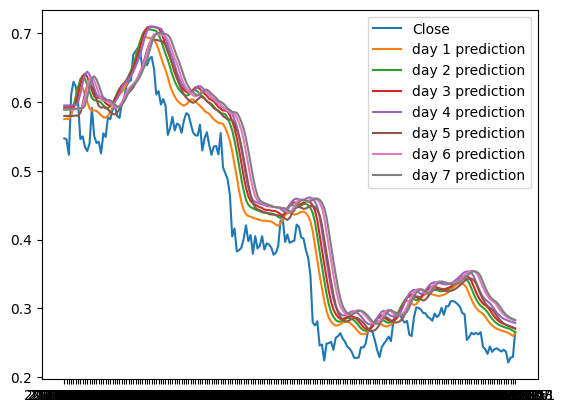

In [13]:
plot_test(scaled_test_df, preds2)

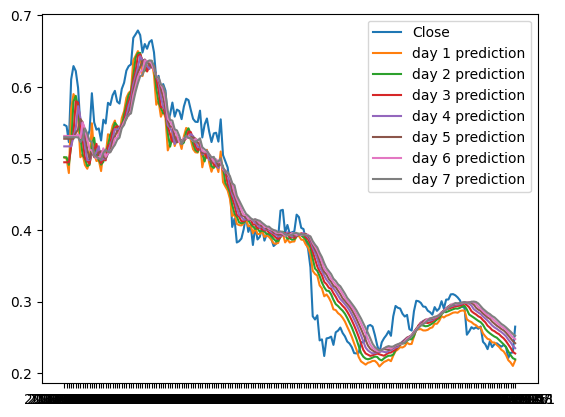

In [14]:
plot_test(scaled_test_df, preds)

In [15]:
train_preds = test(model, loss_fn, train_loader, model_type=1)

test loss: 0.00430


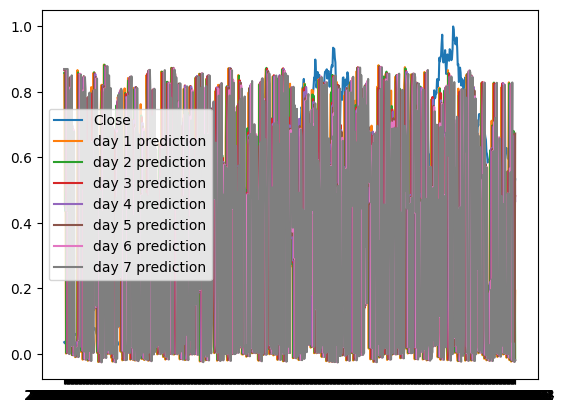

In [16]:
plot_test(scaled_train_df, train_preds)

In [17]:
new_df = pd.concat((scaled_train_df, scaled_test_df))

In [18]:
dataset = SequenceDataset(new_df, target, features)
loader = DataLoader(dataset, batch_size=8, shuffle=False)
entire_preds = test(model, loss_fn, loader, model_type=1)

test loss: 0.00380


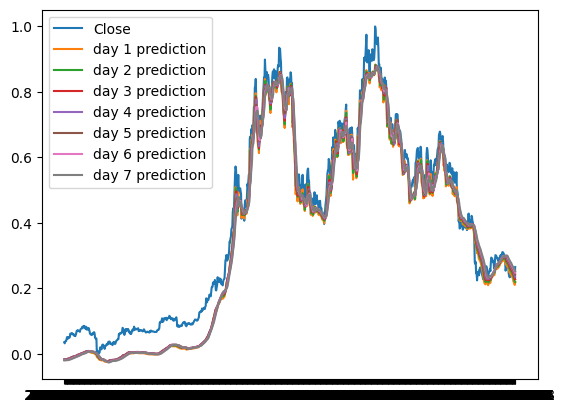

In [19]:
plot_test(new_df, entire_preds)